<a href="https://colab.research.google.com/github/bibekuchiha/Honey-Production-Prediction-using-Linear-Regression/blob/master/Honey_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Honey Production

The honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

We have loaded in a DataFrame for you about honey production in the United States from Kaggle. It is called df and has the following columns:

* state
*   numcol
*   yieldpercol
*  totalprod
*   stocks
*   priceperlb
* prodvalue
* year

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
#Loading datasets
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
#For now, we care about the total production of honey per year.
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
print(prod_per_year)


    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


Create a variable called X that is the column of years in this prod_per_year DataFrame.

After creating X, we will need to reshape it to get it into the right format, using this command:

In [6]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


Create a variable called y that is the totalprod column in the prod_per_year dataset.

In [7]:
y = prod_per_year['totalprod']
print(y)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


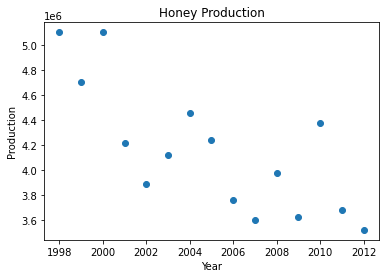

In [20]:
#plot y vs X as a scatterplot.
plt.scatter(X,y)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Honey Production')
plt.show()

#Create and Fit a Linear Regression Model

In [9]:
#Create a linear regression model from scikit-learn and call it regr
regr = LinearRegression()
#Fit the model to the data
regr.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After you have fit the model, print out the slope of the line (stored in a list called regr.coef_) and the intercept of the line (regr.intercept_).

In [10]:
print(regr.coef_)
print(regr.intercept_)

[-88303.18915238]
181208083.10732976


Create a list called y_predict that is the predictions your regr model would make on the X data.




In [11]:
y_predict = regr.predict(X)


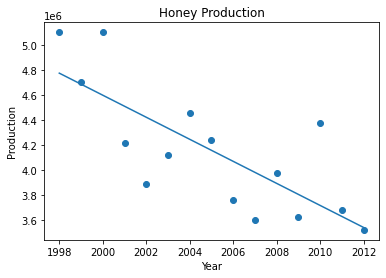

In [21]:
#Plot y_predict vs X as a line,
plt.scatter(X,y)
plt.plot(X, y_predict)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Honey Production')
plt.show()

#Predict the Honey Decline
 Let’s predict what the year 2050 may look like in terms of honey production.

In [14]:
# let’s create a NumPy array called X_future that is the range from 2013 to 2050.
X_future = np.array(range(2013,2050))
X_future = X_future.reshape(-1,1)
print(X_future)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]]


Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future.

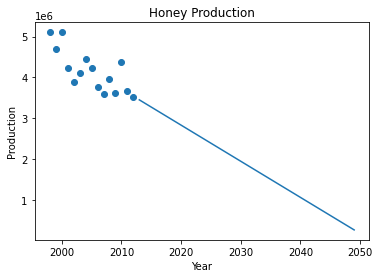

In [19]:
future_predict = regr.predict(X_future)
#Plot future_predict vs X_future
plt.scatter(X,y)
plt.plot(X_future,future_predict )
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Honey Production')
plt.show()